# Debugging Euclid2HST Dataset

In this Notebook we try to investigate the problem with dataset which is having the inputs equal to the output.

## Required Libraries and Functions

In [1]:
%matplotlib inline
import sys

# Add library path to PYTHONPATH
lib_path = '/gpfswork/rech/xdy/uze68md/GitHub/'
path_alphatransform = lib_path+'alpha-transform'
path_score = lib_path+'score'
sys.path.insert(0, path_alphatransform)
sys.path.insert(0, path_score)

# Libraries
from galaxy2galaxy import problems
import tensorflow as tf
from scipy import fft
import galflow as gf
import numpy as np
import matplotlib.pyplot as plt

## Generate The Evaluation Datasets

The original dataset is located in `attrs2img_cosmos_hst2euclid`. We generated another dataset with a(n unrealistically) bigger HST PSF to be able to check wether the observed galaxy images in inputs and targets are those of HST or Euclid. The second dataset is located in `attrs2img_cosmos_hst2euclid_test2`.

In [2]:
# Let's create an instance of the hsc_problem
Modes = tf.estimator.ModeKeys
problem128 = problems.problem('attrs2img_cosmos_hs_t2_euclid')
dset = problem128.dataset(Modes.TRAIN, data_dir='/gpfswork/rech/xdy/uze68md/data/attrs2img_cosmos_hst2euclid/')
dset = dset.repeat()
dset_test = problem128.dataset(Modes.TRAIN, data_dir='/gpfswork/rech/xdy/uze68md/data/attrs2img_cosmos_hst2euclid_test/')
dset_test = dset_test.repeat()

n_batchs = 128

dset = dset.batch(n_batchs)
dset_test = dset_test.batch(n_batchs)


INFO:tensorflow:Reading data files from /gpfswork/rech/xdy/uze68md/data/attrs2img_cosmos_hst2euclid/attrs2img_cosmos_hs_t2_euclid-train*
INFO:tensorflow:partition: 0 num_data_files: 80
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_determinstic`.

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Reading data files from /gpfswork/rech/xdy/uze68md/data/attrs2img_cosmos_hst2euclid_test/attrs2img_cosmos_hs_t2_euclid-train*
INFO:tensorflow:partition: 0 num_data_files: 1


## Extract a Batch

In [3]:
# Build an iterator over this dataset, and extract a batch
iterator = dset.make_one_shot_iterator().get_next()
iterator_test = dset_test.make_one_shot_iterator().get_next()
sess = tf.Session()
batch = sess.run(iterator)
batch_test = sess.run(iterator_test)
sess.close()

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


## Load and Apply Trained Model on Batch

/gpfslocalsup/pub/anaconda-py3/2019.10/envs/tensorflow-gpu-1.15.2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


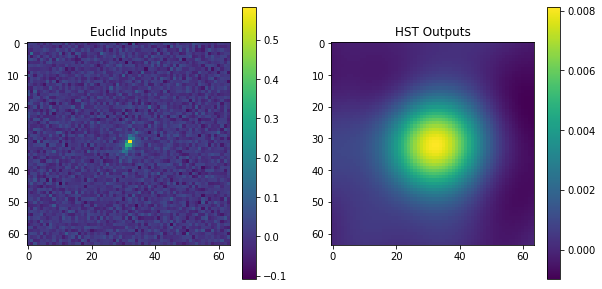

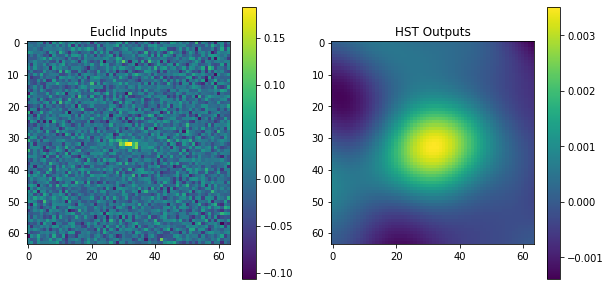

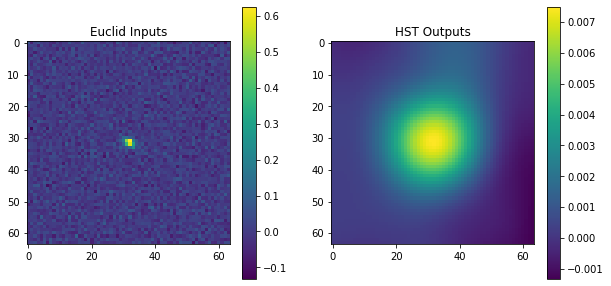

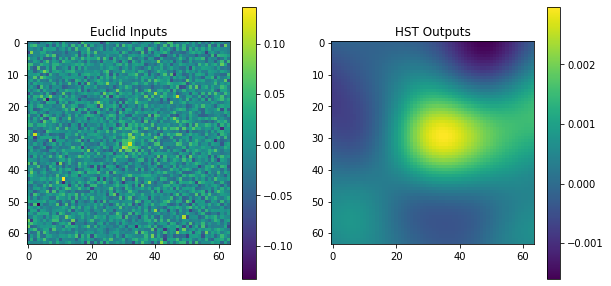

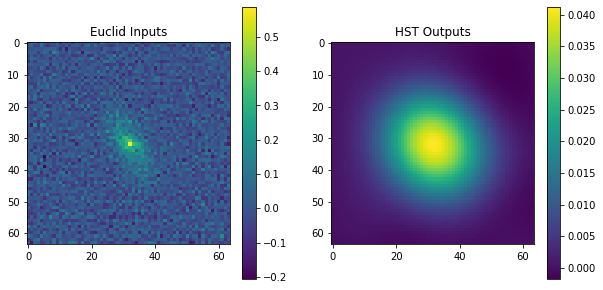

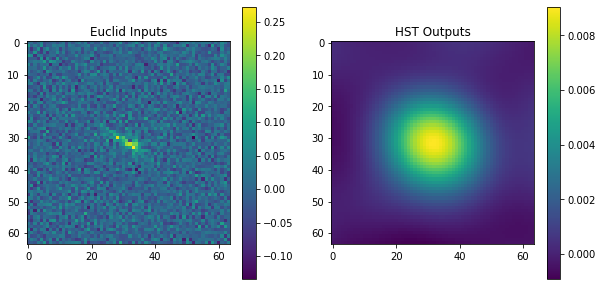

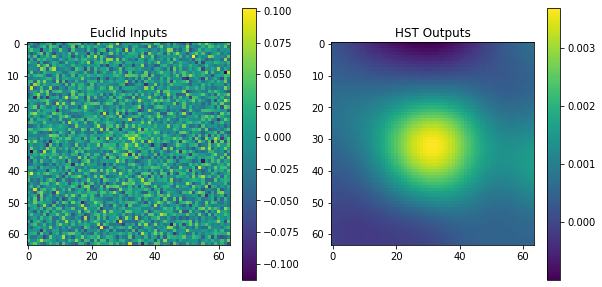

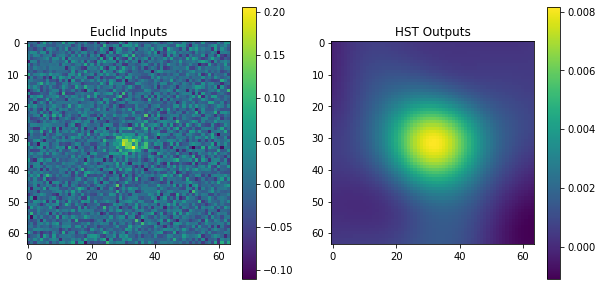

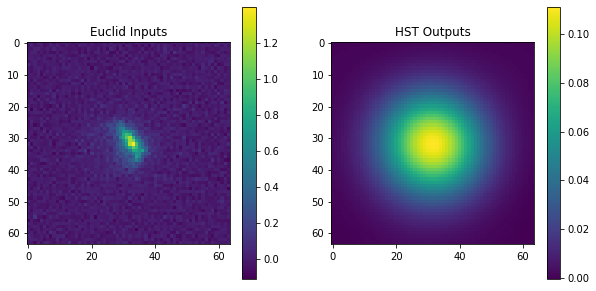

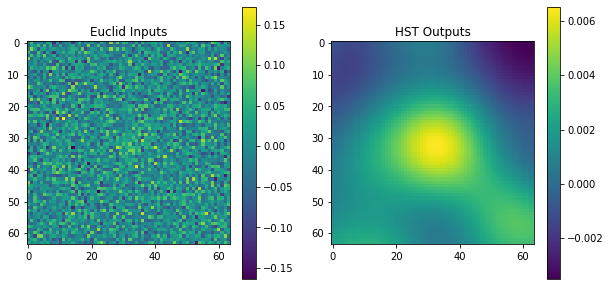

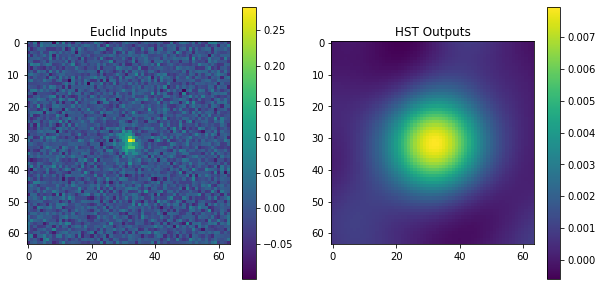

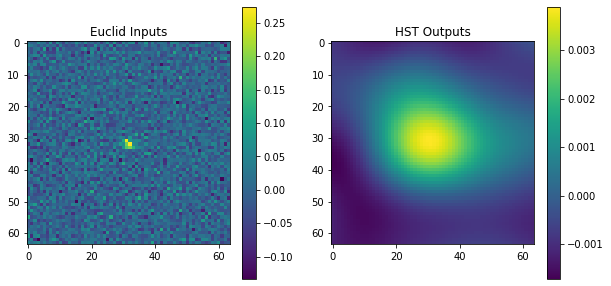

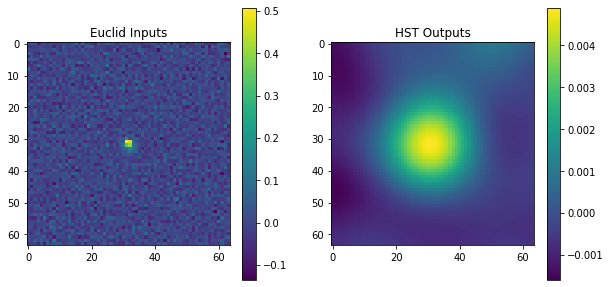

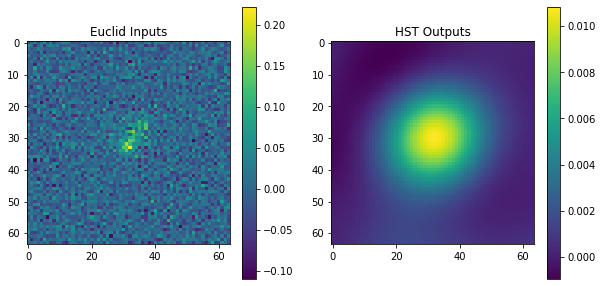

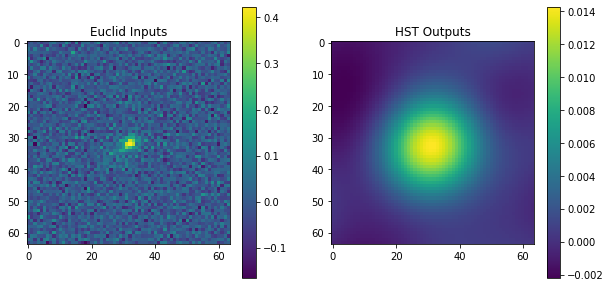

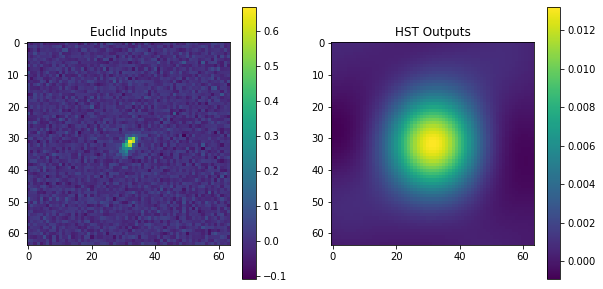

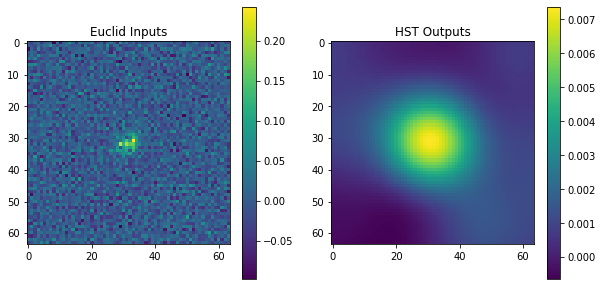

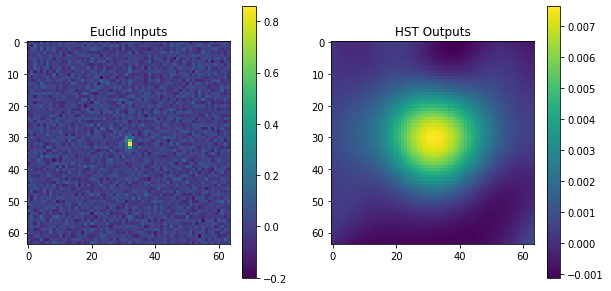

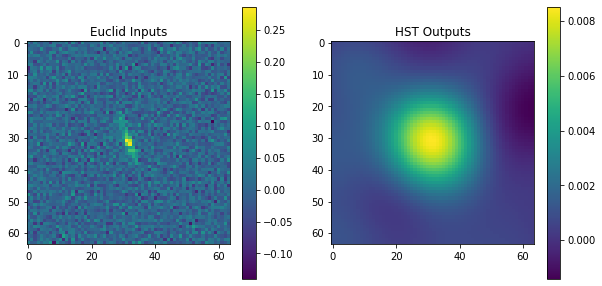

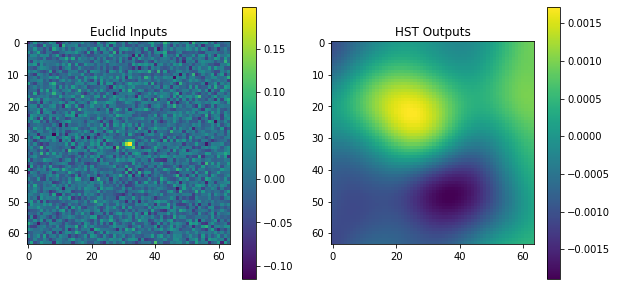

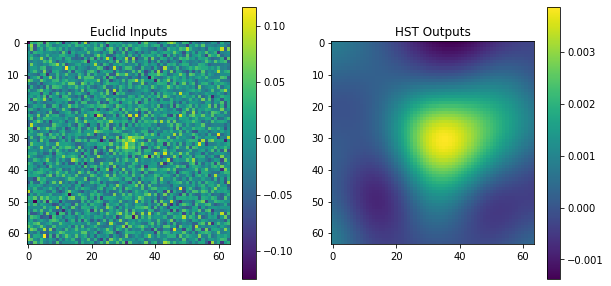

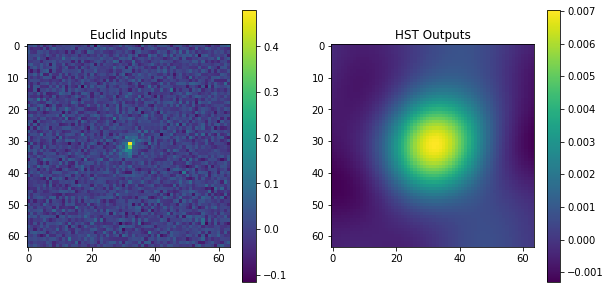

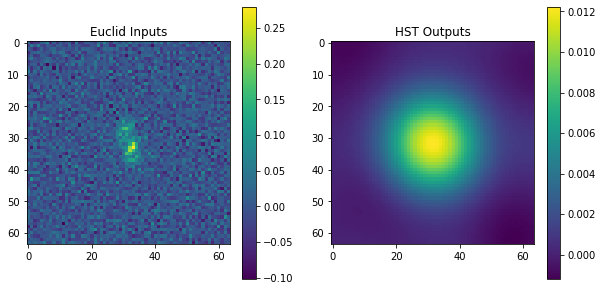

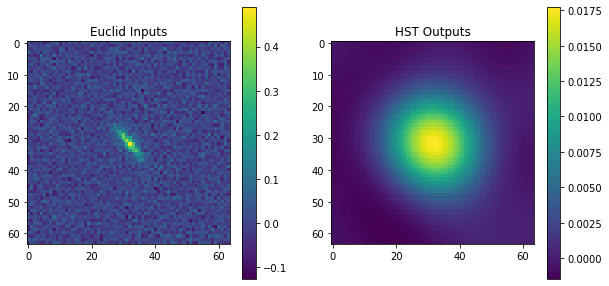

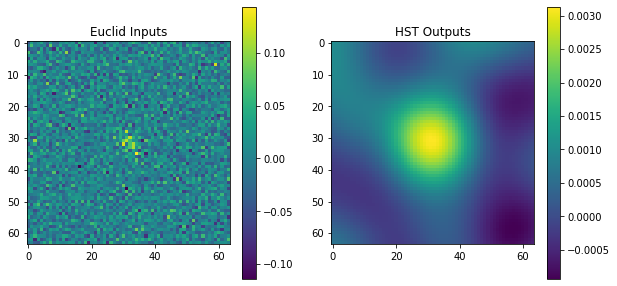

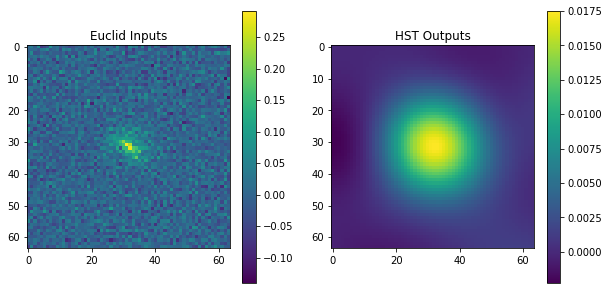

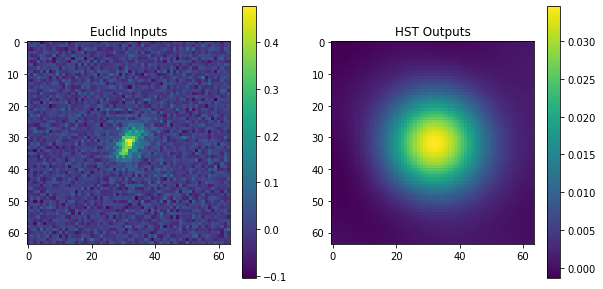

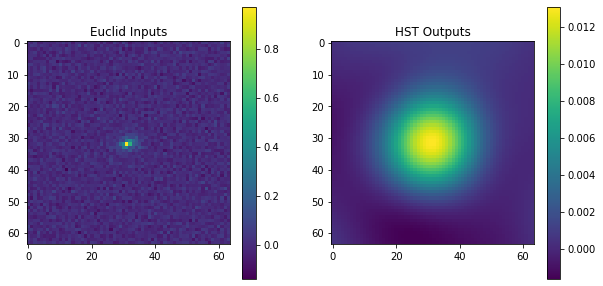

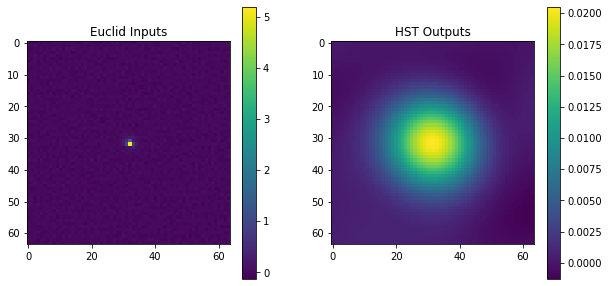

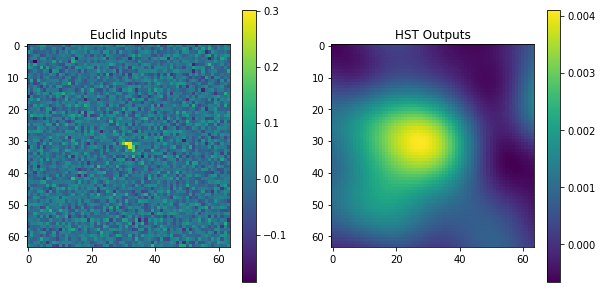

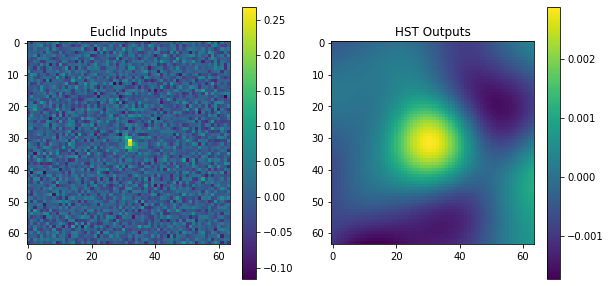

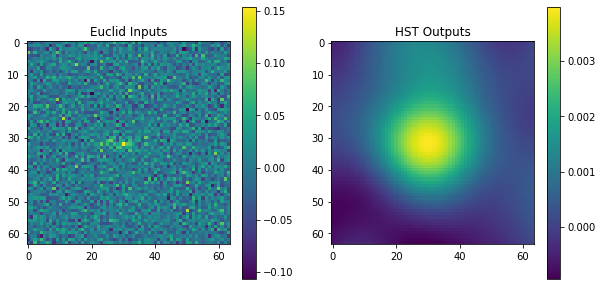

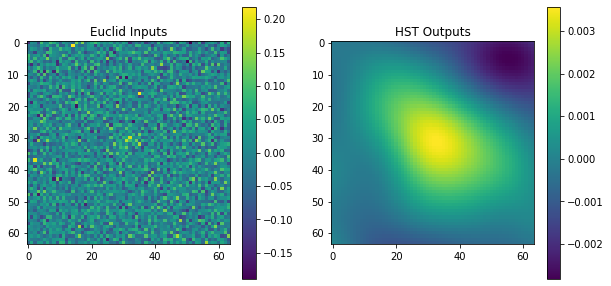

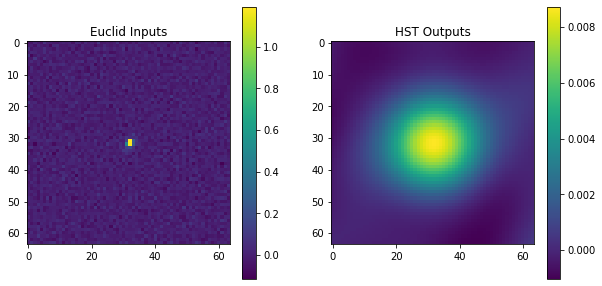

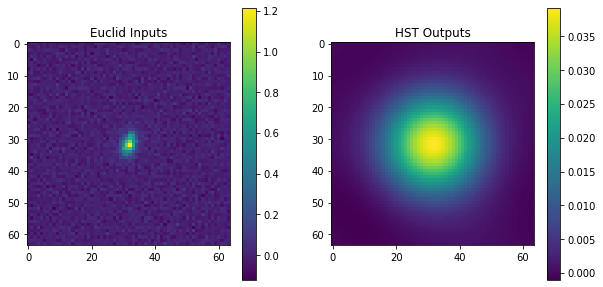

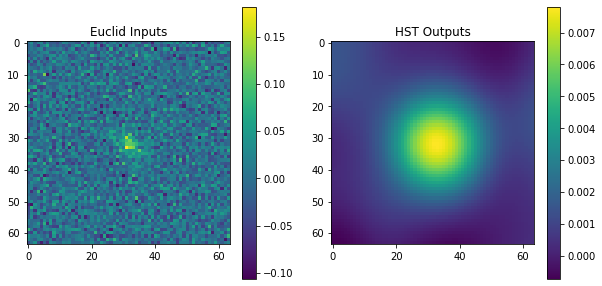

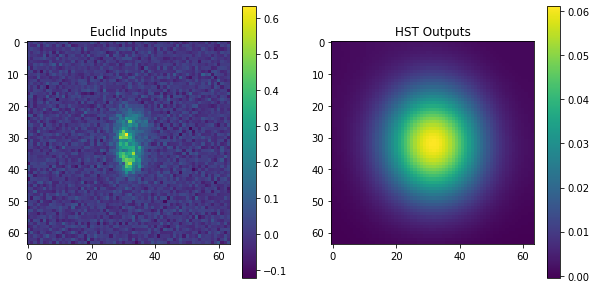

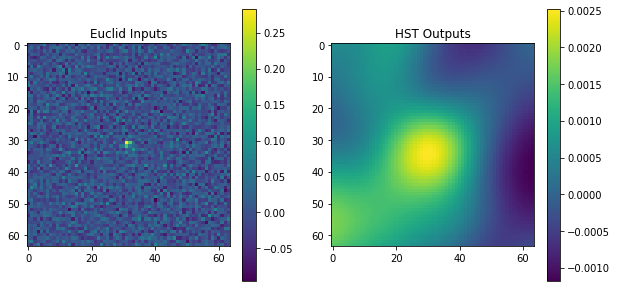

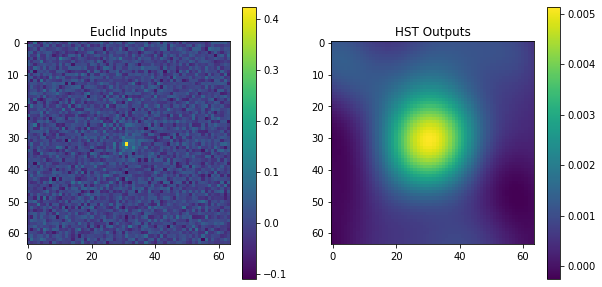

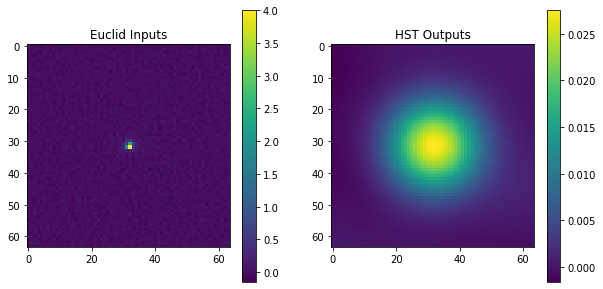

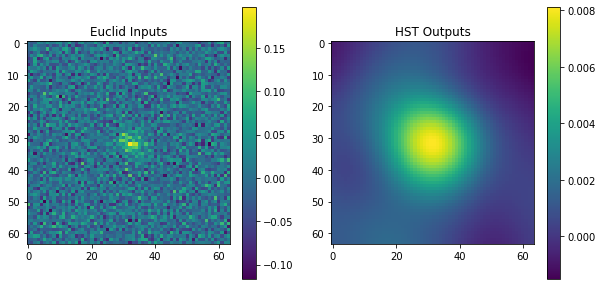

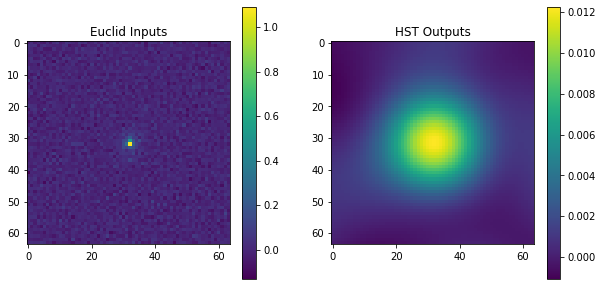

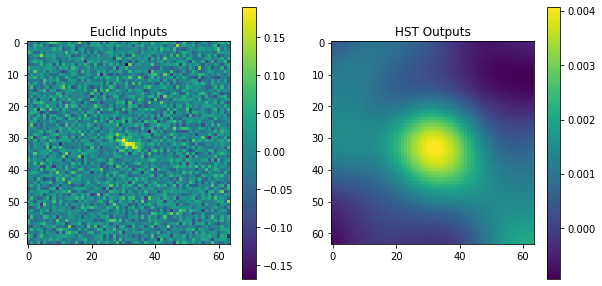

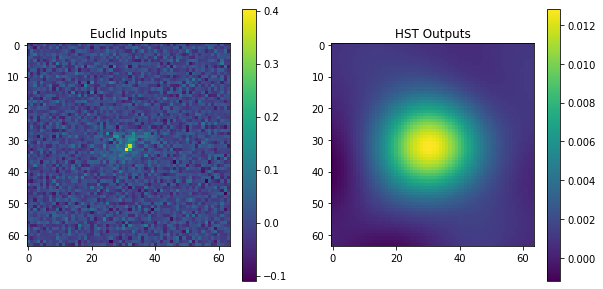

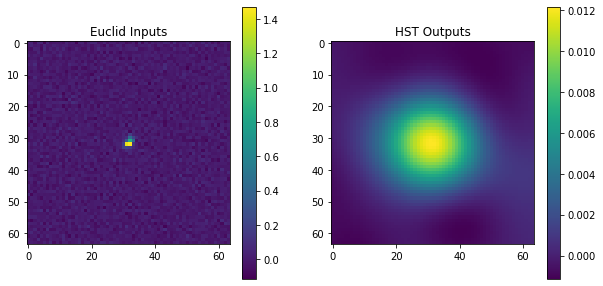

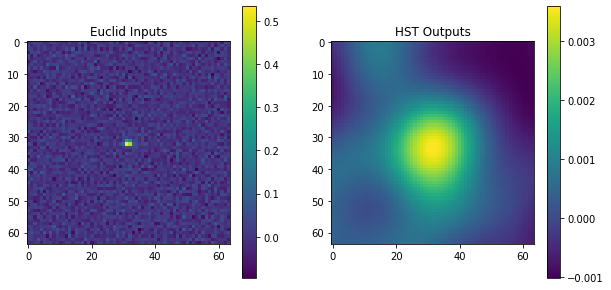

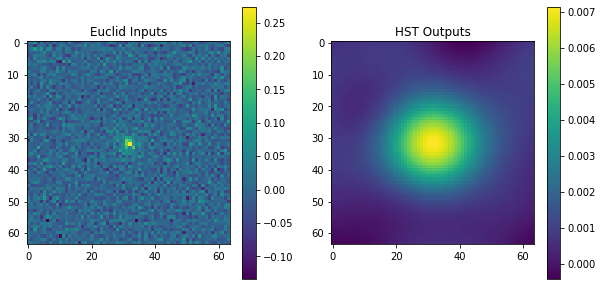

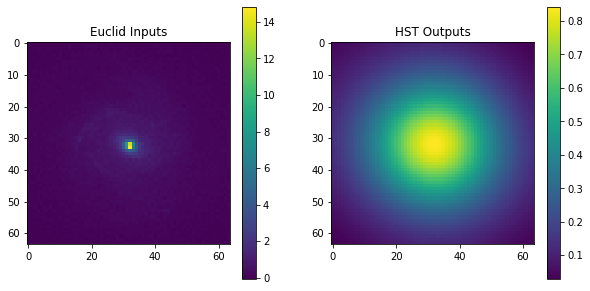

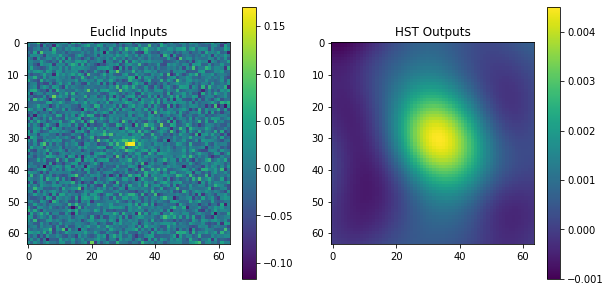

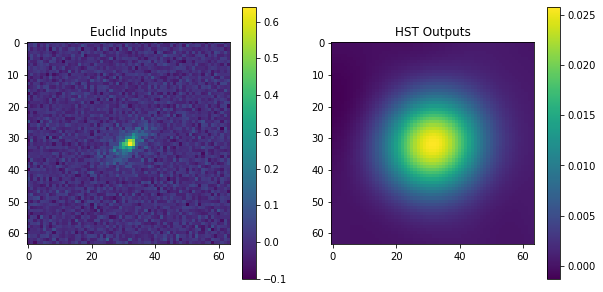

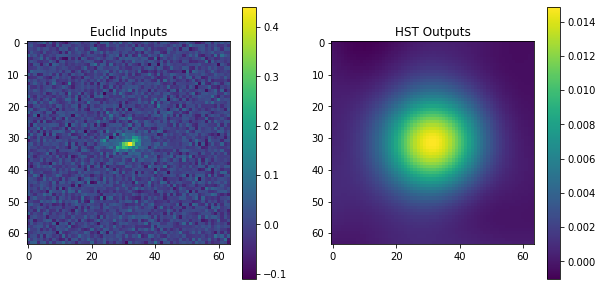

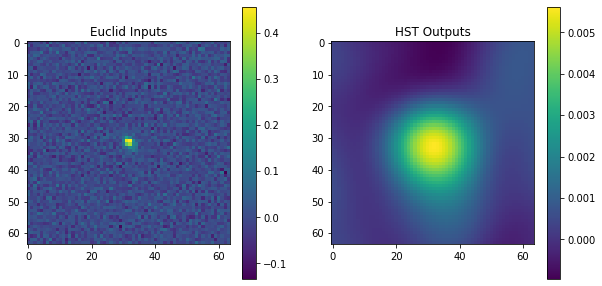

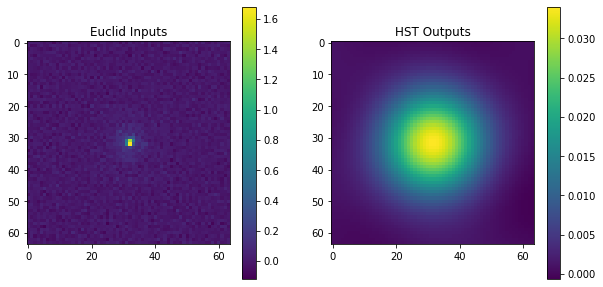

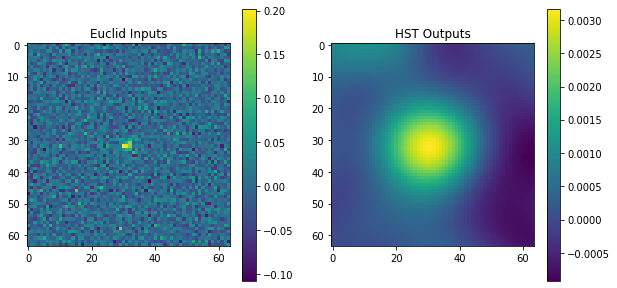

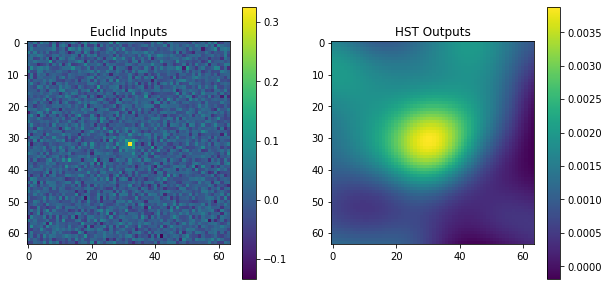

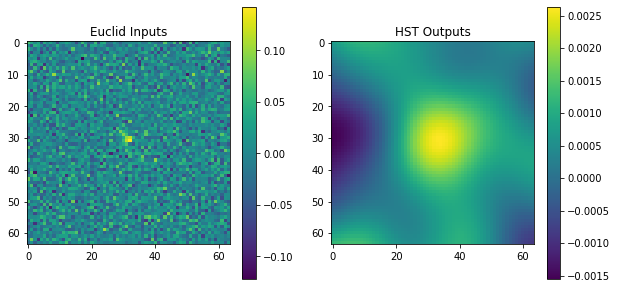

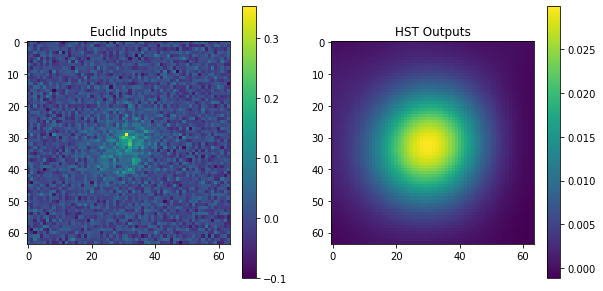

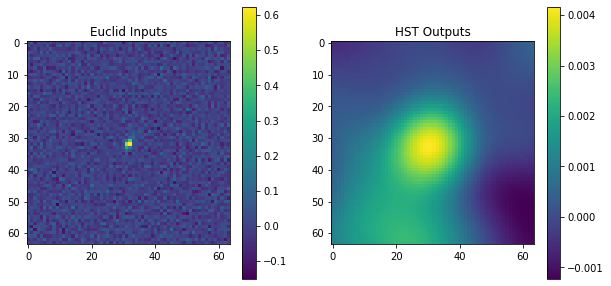

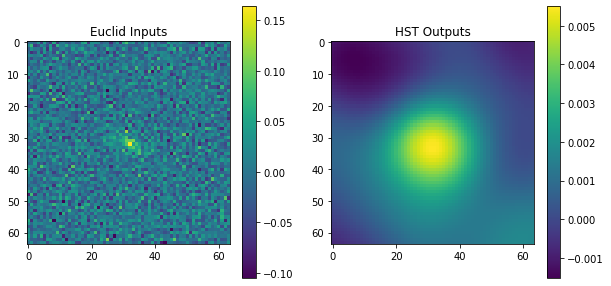

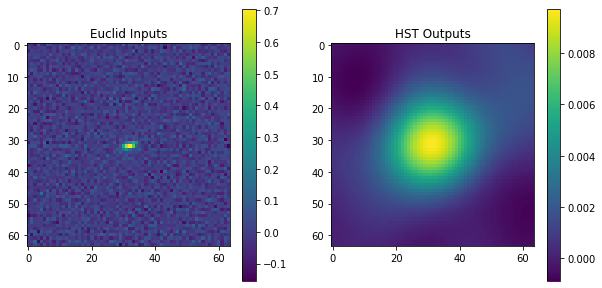

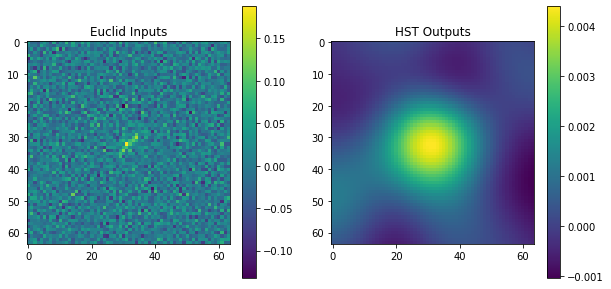

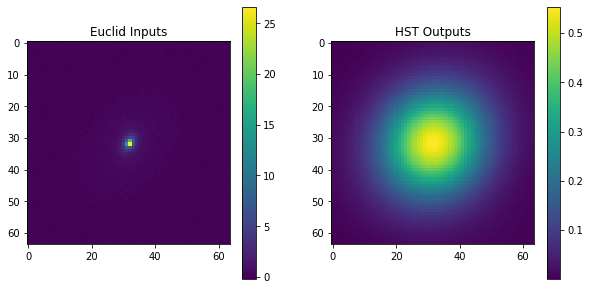

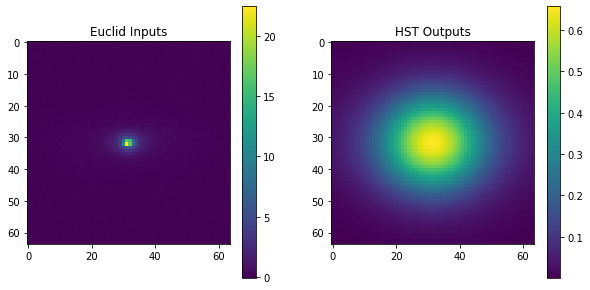

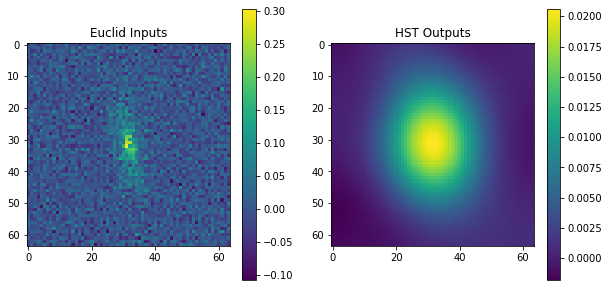

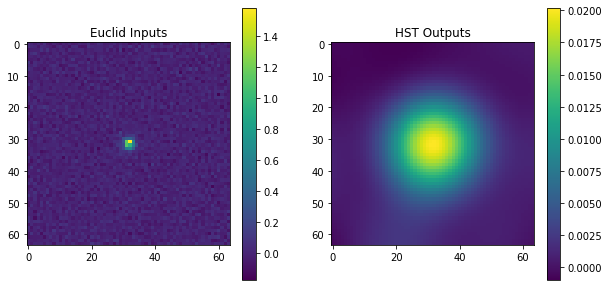

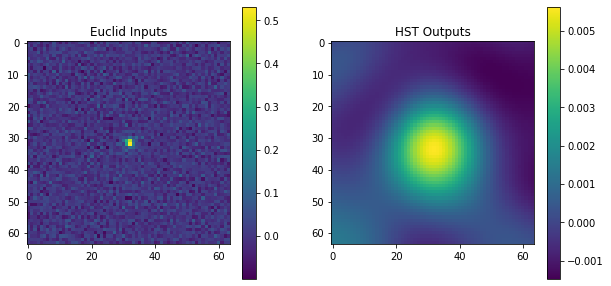

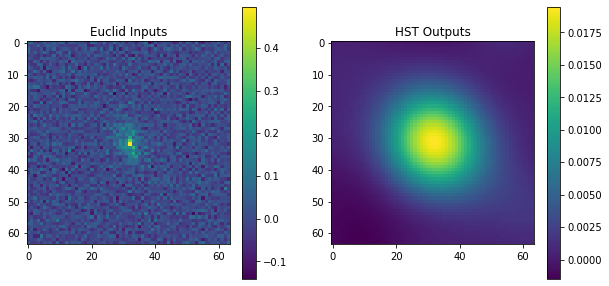

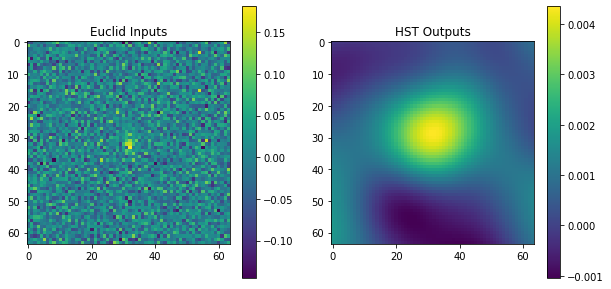

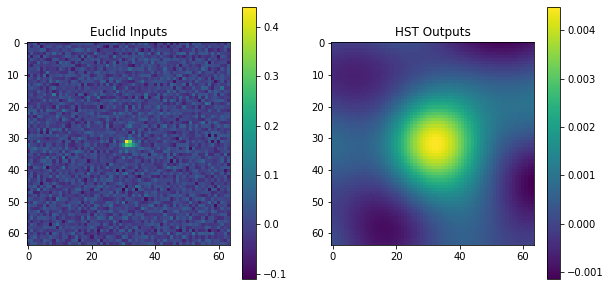

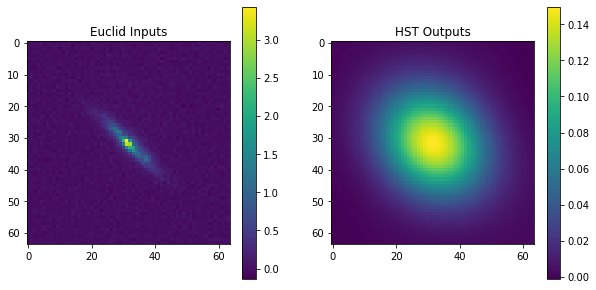

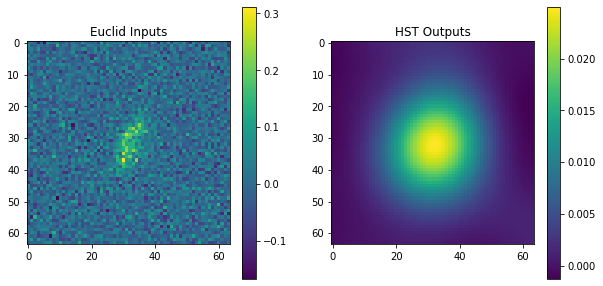

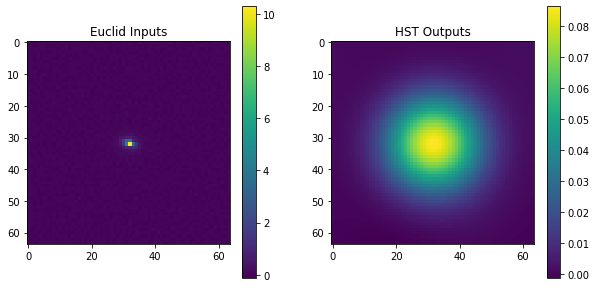

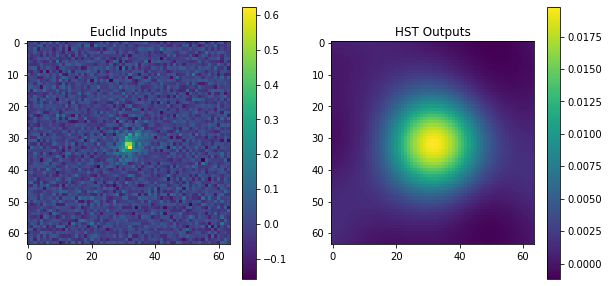

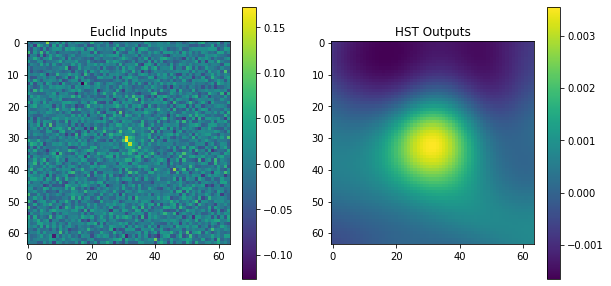

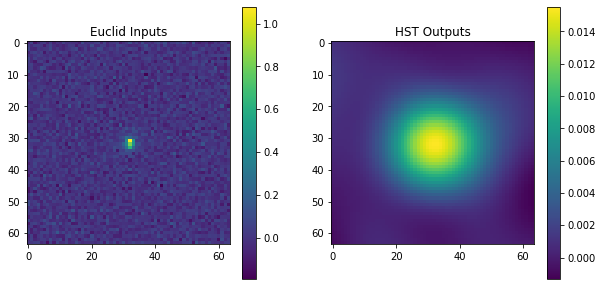

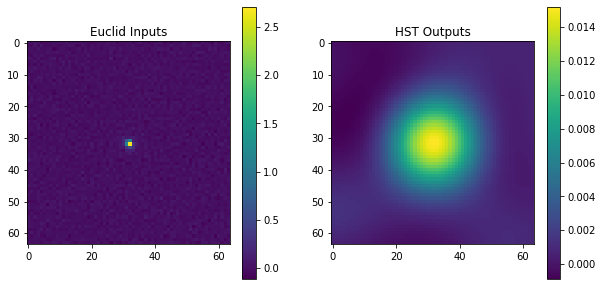

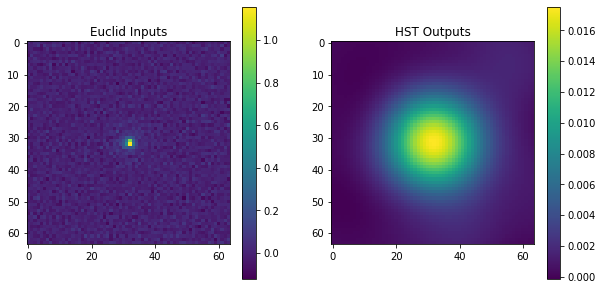

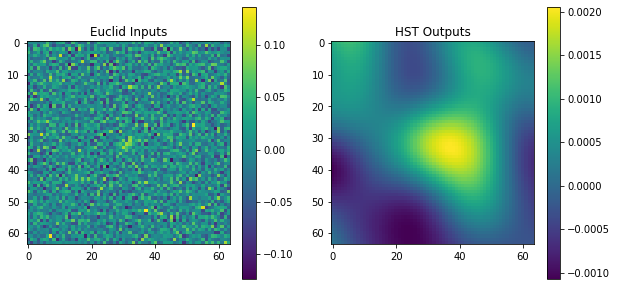

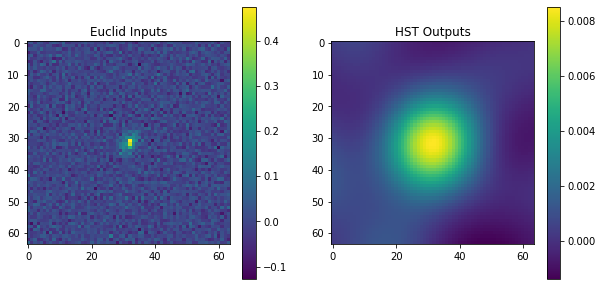

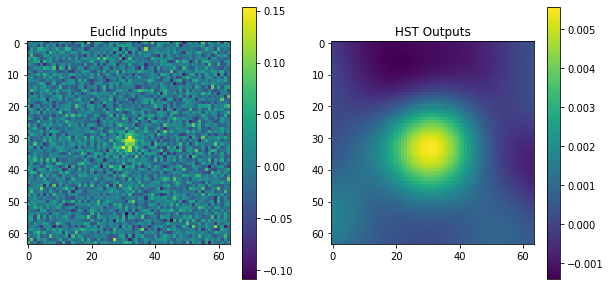

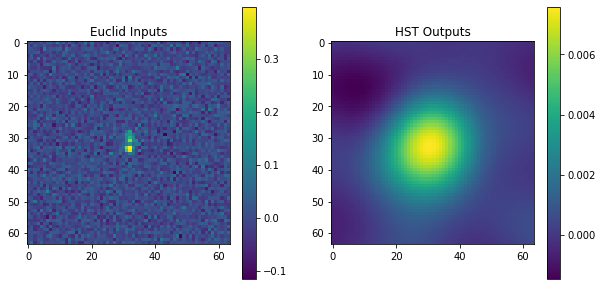

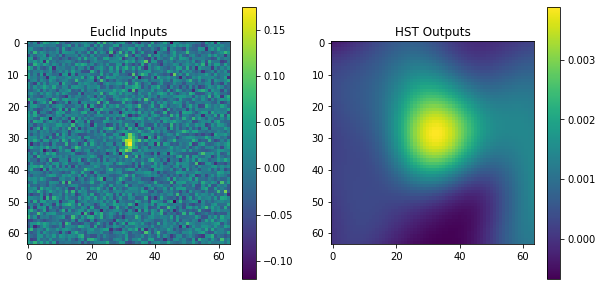

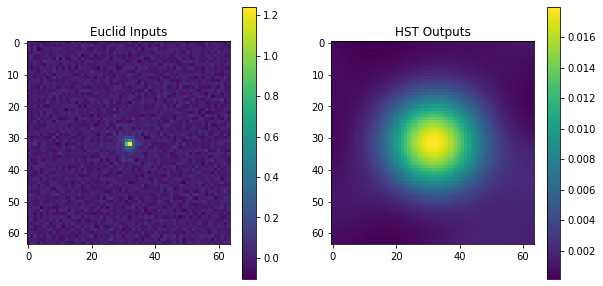

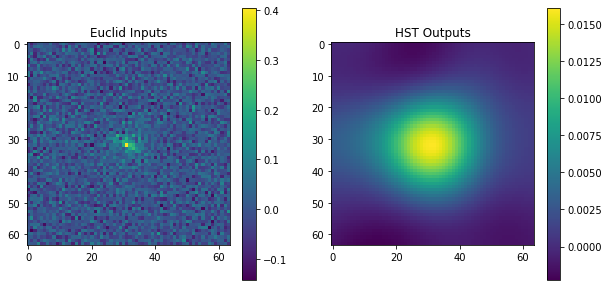

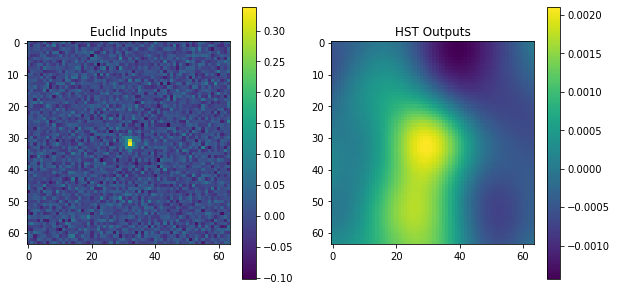

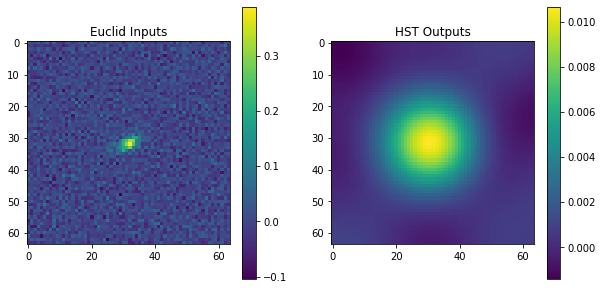

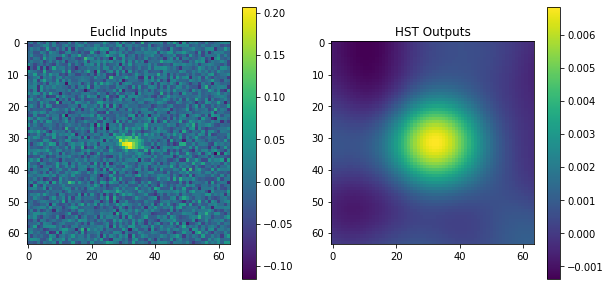

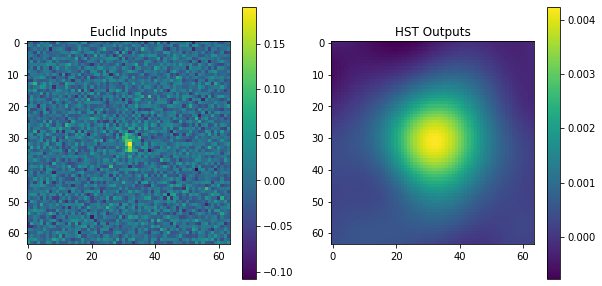

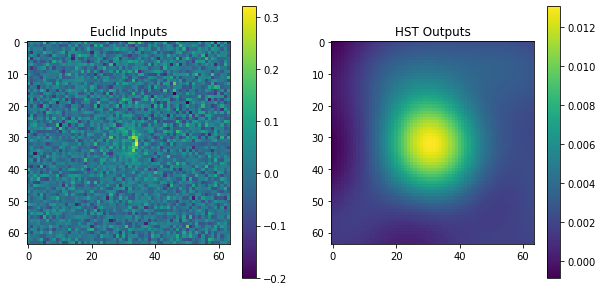

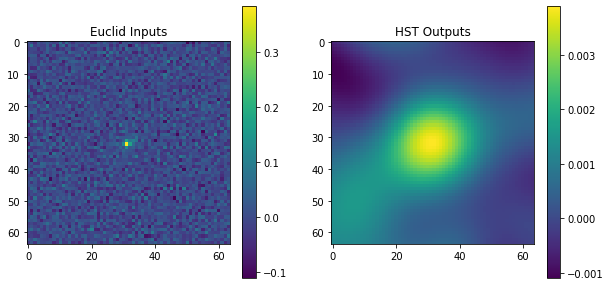

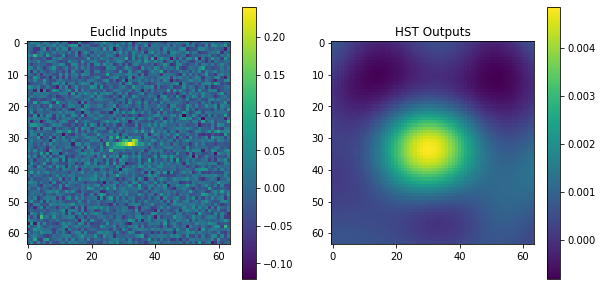

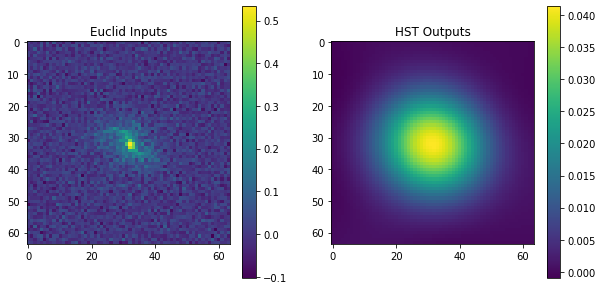

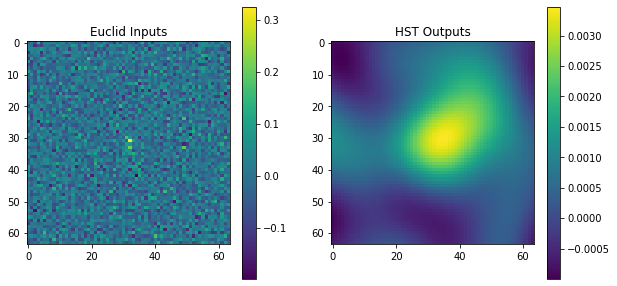

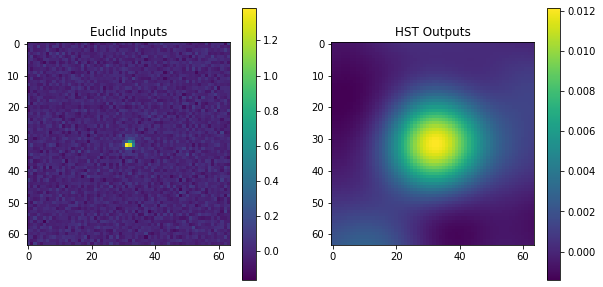

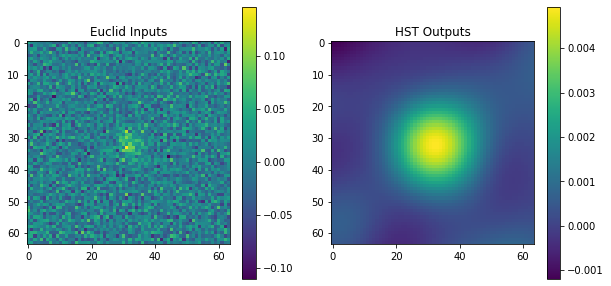

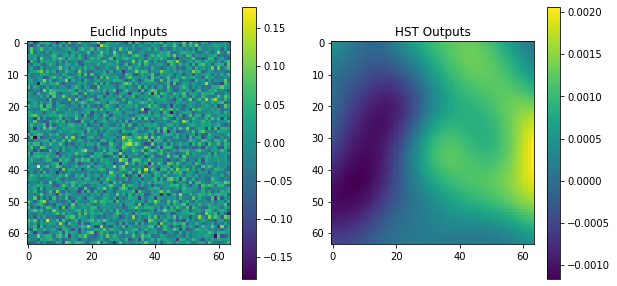

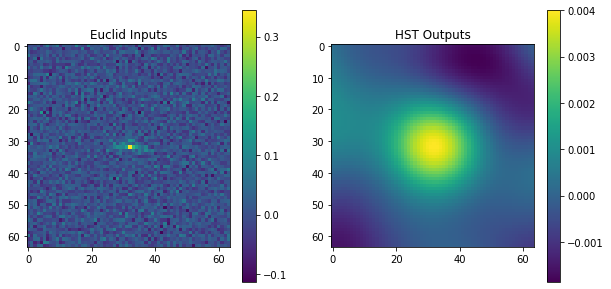

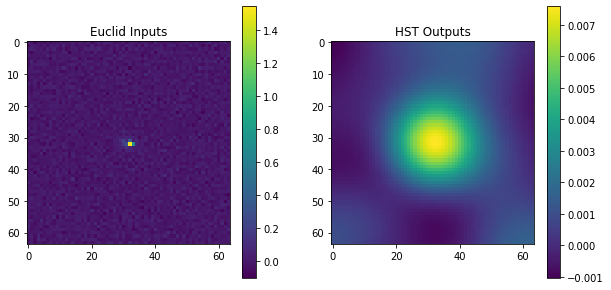

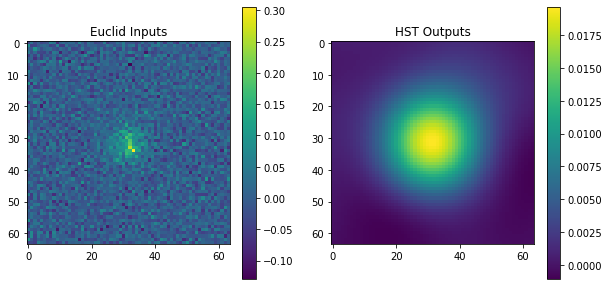

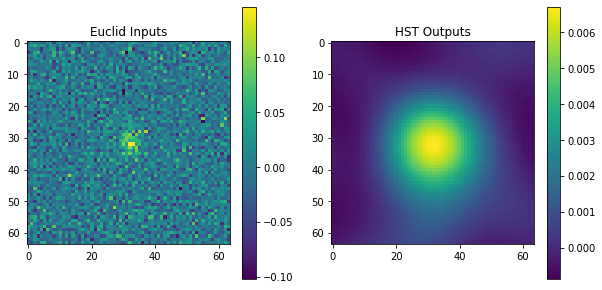

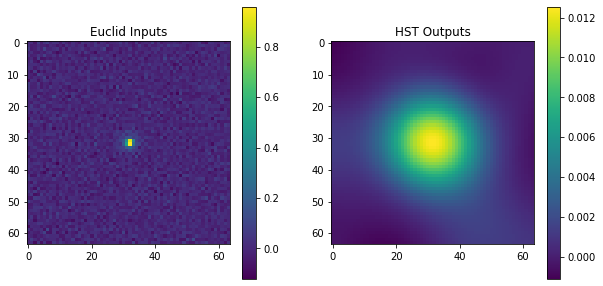

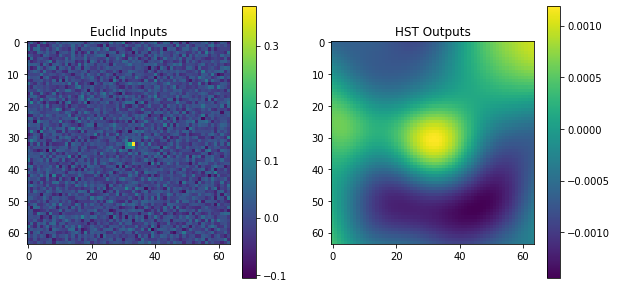

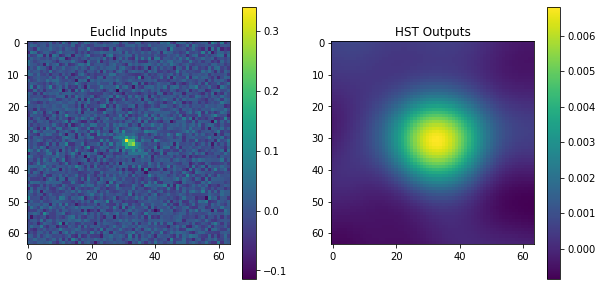

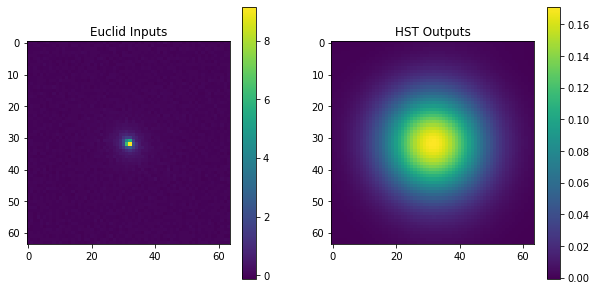

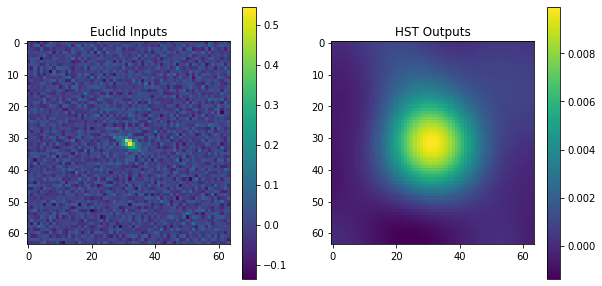

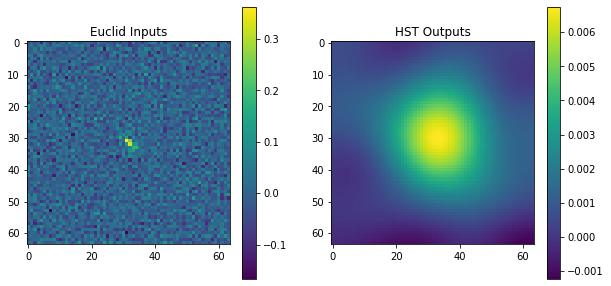

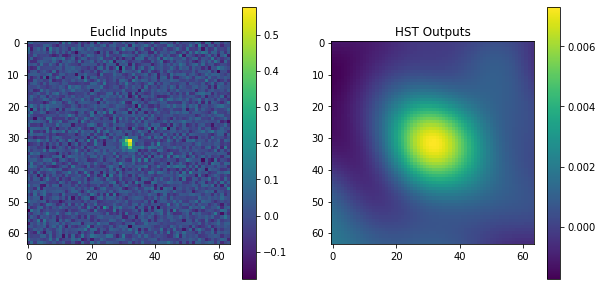

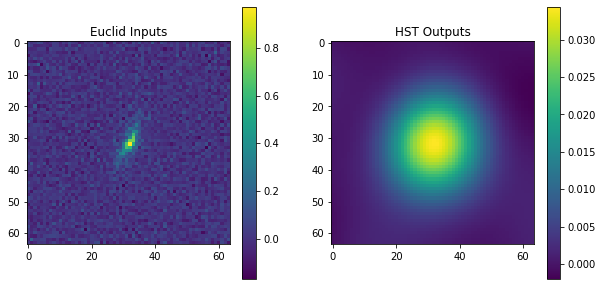

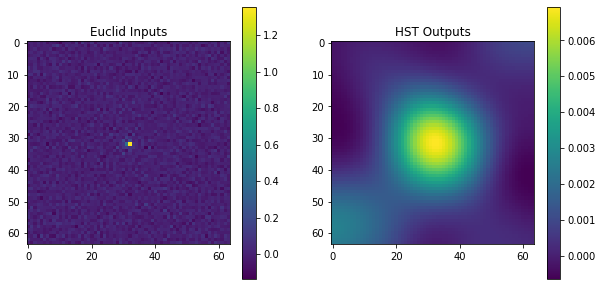

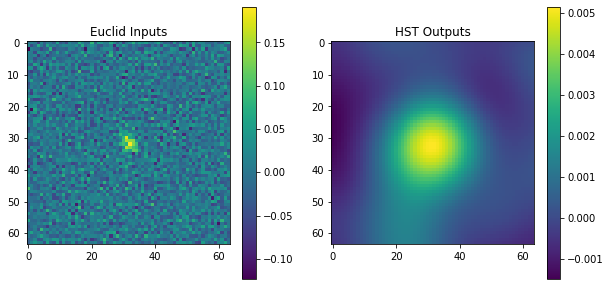

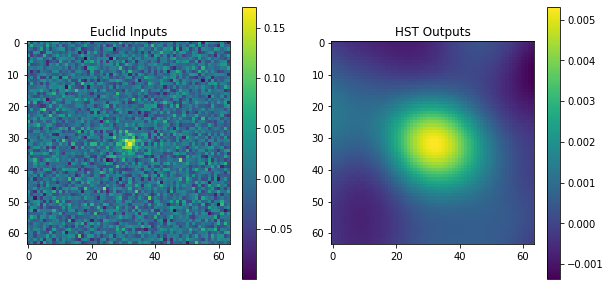

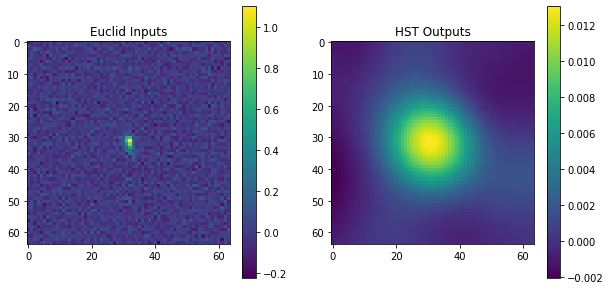

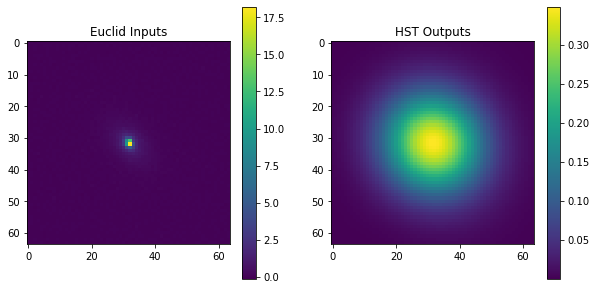

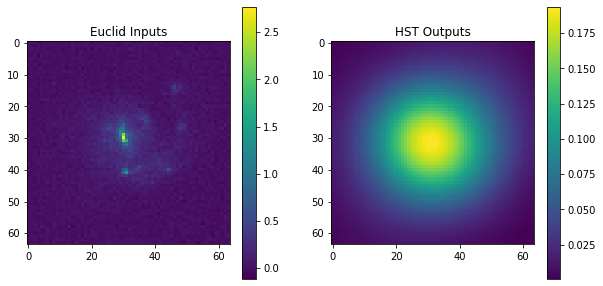

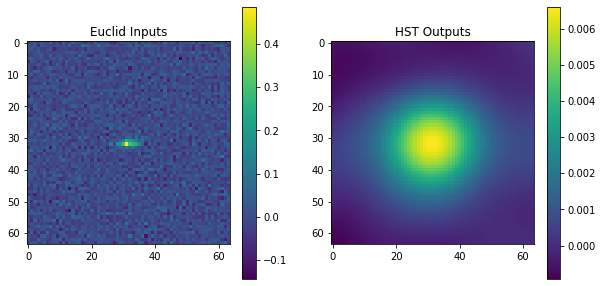

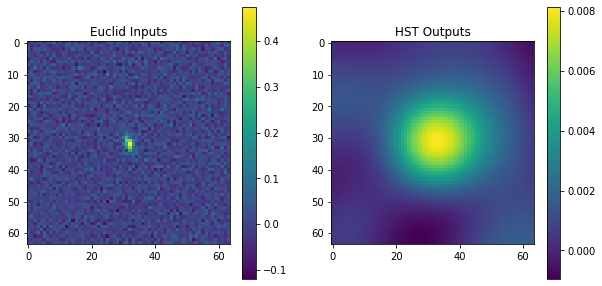

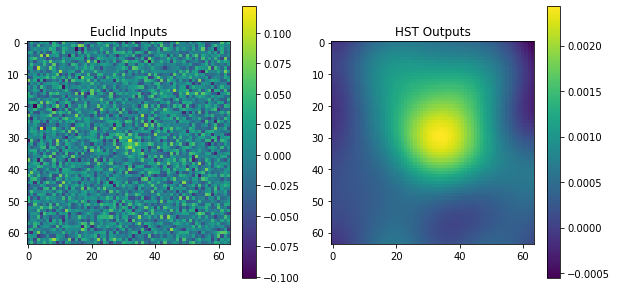

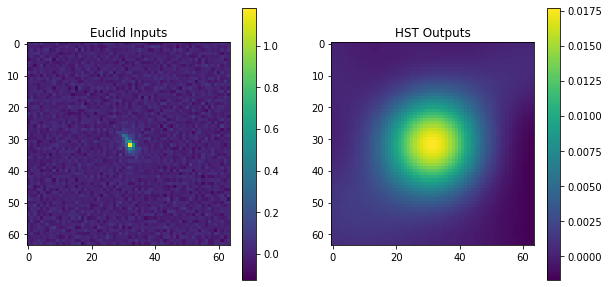

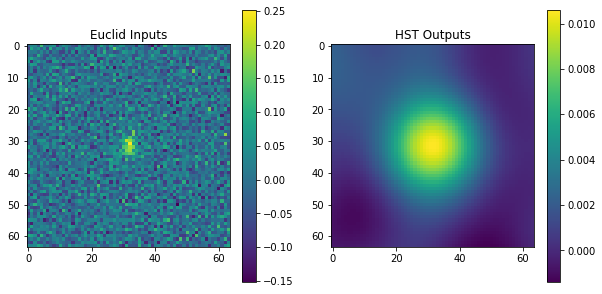

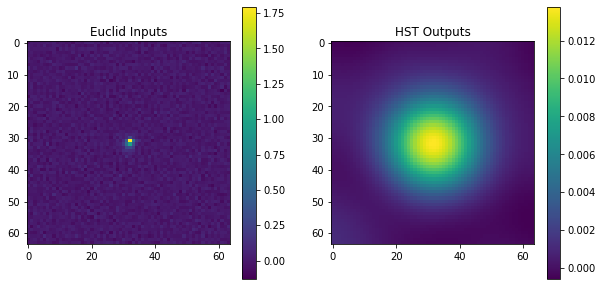

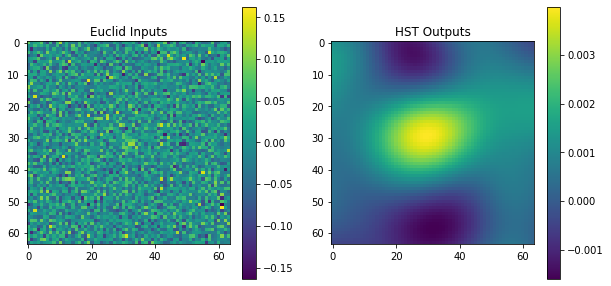

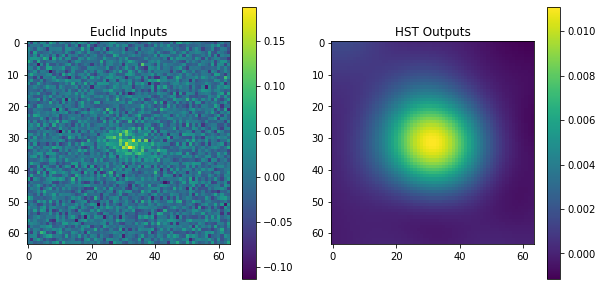

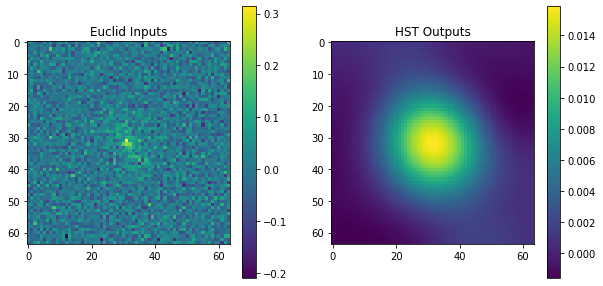

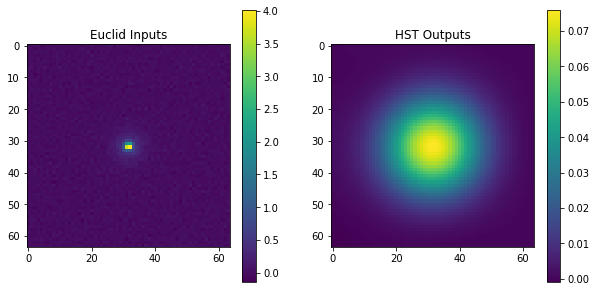

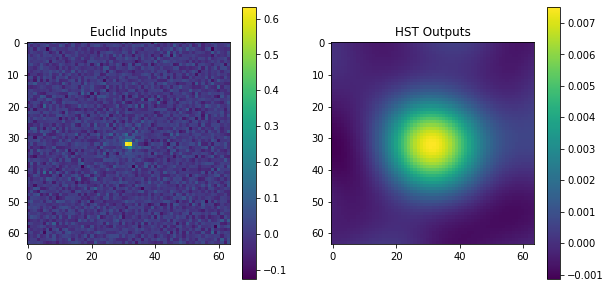

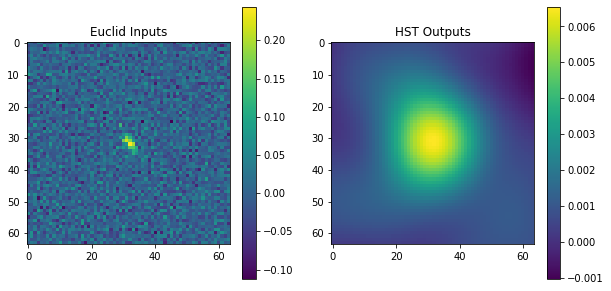

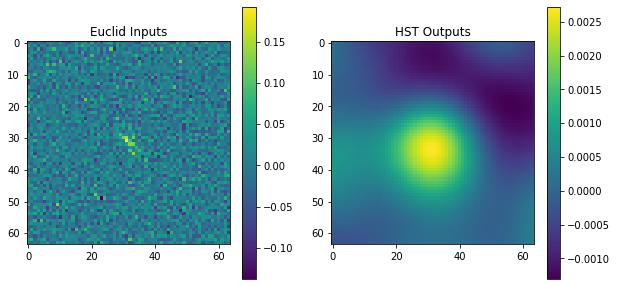

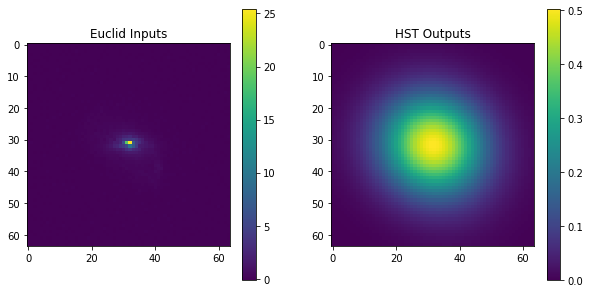

In [5]:
for i in range(128):
    plt.figure(i*1000,figsize=(10,5))
    plt.subplot(121)
    plt.imshow(batch_test['inputs'][i,...,0])
    plt.title('Euclid Inputs')
    plt.colorbar()
    plt.subplot(122)
    plt.imshow(batch_test['targets'][i,...,0])
    plt.title('HST Outputs')
    plt.colorbar()
